<a href="https://colab.research.google.com/github/SVithurabiman/ComputerVisionProjects/blob/main/Detect%20camera%20movement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/bimalka98/Stitch-images-using-SuperGlue-GNN.git

Cloning into 'Stitch-images-using-SuperGlue-GNN'...
remote: Enumerating objects: 319, done.
remote: Total 319 (delta 0), reused 0 (delta 0), pack-reused 319
Receiving objects: 100% (319/319), 187.97 MiB | 33.58 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Checking out files: 100% (106/106), done.


In [2]:
%cd /content/Stitch-images-using-SuperGlue-GNN

/content/Stitch-images-using-SuperGlue-GNN


In [3]:
# generating the necessary txt file to input for the super glue algorithm
img_name = '' # set of outdoor images
num_images = 5
# Order of the images. To stitch left and right images as depicted in the below
order = range(num_images -1,0,-1) 
with open('adobe_panorama.txt', 'w') as file:
    for i in order:
        file.write("{:01}.jpg {:01}.jpg\n".format(i,i-1))

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [7]:
import os

import shutil
 

shutil.rmtree('/content/Stitch-images-using-SuperGlue-GNN/adobe_panorama')
os.mkdir('/content/Stitch-images-using-SuperGlue-GNN/adobe_panorama')


In [8]:
%cp -r /content/drive/MyDrive/picture/.  /content/Stitch-images-using-SuperGlue-GNN/adobe_panorama


In [9]:


import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config Completer.use_jedi = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  import sys


In [10]:
!python match_pairs.py  --resize -1\
                        --superglue outdoor \
                        --max_keypoints 2048 \
                        --nms_radius 5 \
                        --resize_float \
                        --input_dir adobe_panorama/ \
                        --input_pairs adobe_panorama.txt \
                        --output_dir adobe_panorama/output \
                        --viz \
                        --keypoint_threshold 0.05 \
                        --match_threshold 0.9

Namespace(cache=False, eval=False, fast_viz=False, force_cpu=False, input_dir='adobe_panorama/', input_pairs='adobe_panorama.txt', keypoint_threshold=0.05, match_threshold=0.9, max_keypoints=2048, max_length=-1, nms_radius=5, opencv_display=False, output_dir='adobe_panorama/output', resize=[-1], resize_float=True, show_keypoints=False, shuffle=False, sinkhorn_iterations=20, superglue='outdoor', viz=True, viz_extension='png')
Will not resize images
Running inference on device "cpu"
Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)
Looking for data in directory "adobe_panorama"
Will write matches to directory "adobe_panorama/output"
Will write visualization images to directory "adobe_panorama/output"
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internal

In [11]:
npz_files = ["{:01}_{:01}_matches.npz".format(i,i-1, img = img_name) for i in order]
for file in npz_files:
    path = 'adobe_panorama/output/'+file
    npz = np.load(path)
print(npz.files)

['keypoints0', 'keypoints1', 'matches', 'match_confidence']


In [12]:
def loadNPZ(npz_file):    
    npz = np.load('adobe_panorama/output/'+ npz_file)
    point_set1 = npz['keypoints0'][npz['matches']>-1]
    matching_indexes =  npz['matches'][npz['matches']>-1] # -1 if the keypoint is unmatched
    point_set2 = npz['keypoints1'][matching_indexes]
    print("Number of matching points for the findHomography algorithm:")
    print("In left  image:", len(point_set1),"\nIn right image:", len(point_set2))
    return point_set1, point_set2

In [13]:
def pltSourceImages(imageSet):    
    im_left = cv.imread('adobe_panorama/{:01}.jpg'.format(imageSet),cv.IMREAD_ANYCOLOR)
    im_right = cv.imread('adobe_panorama/{:01}.jpg'.format(imageSet -1),cv.IMREAD_ANYCOLOR)
    
    # Marking the detected features on the two images.
    for point in point_set1.astype(np.int32):
        cv.circle(im_left, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)

    for point in point_set2.astype(np.int32):
        cv.circle(im_right, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)

    fig = plt.figure(figsize = (10,10))
    plt.subplot(121),plt.imshow(im_left, cmap='gray', vmin = 0, vmax = 255)
    plt.subplot(122),plt.imshow(im_right, cmap='gray', vmin = 0, vmax = 255)
    plt.show()

In [14]:
def plotMatches(imageSet):
    plt.figure(figsize=(10,10))
    matched_points = cv.imread('adobe_panorama/output/{:01}_{:01}_matches.png'.\
                     format(imageSet, imageSet -1),cv.IMREAD_ANYCOLOR)
    plt.imshow(matched_points, cmap='gray', vmin = 0, vmax = 255)
    plt.show()

Number of matching points for the findHomography algorithm:
In left  image: 1384 
In right image: 1384


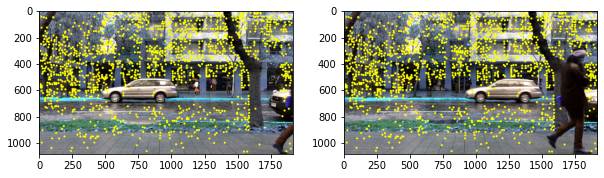

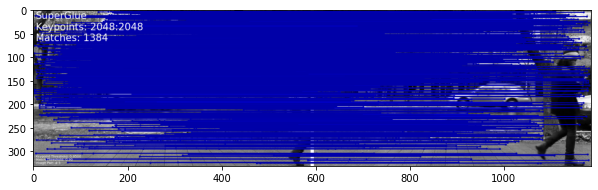

[[ 9.99921228e-01 -7.79240874e-05  7.03691174e-02]
 [-9.47508990e-05  9.99710186e-01  1.51119819e-01]
 [-2.67990675e-08 -9.83215866e-08  1.00000000e+00]]


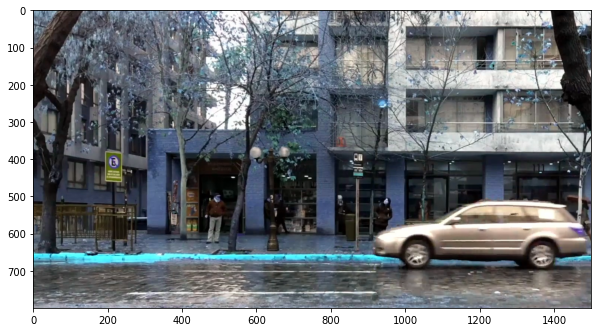

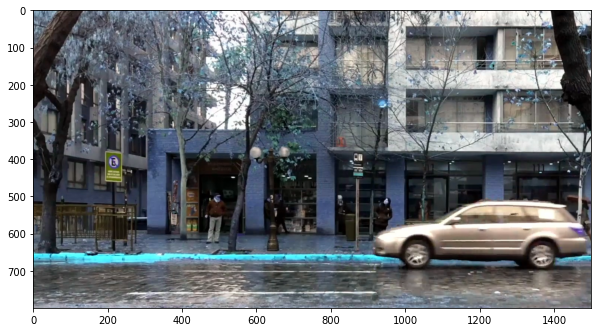

----------------------------------------------------------------------------------------------------
Number of matching points for the findHomography algorithm:
In left  image: 1261 
In right image: 1261


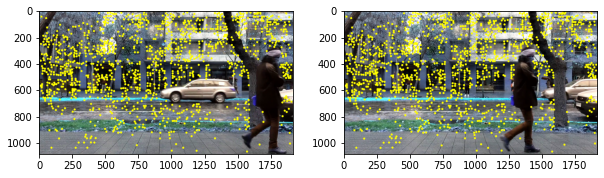

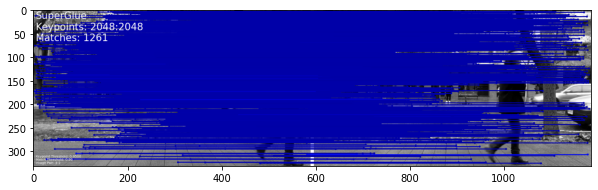

[[ 9.99869709e-01 -5.25435469e-04  2.61395329e-01]
 [ 1.68521301e-06  9.99728137e-01  1.14310283e-02]
 [ 1.53934496e-08 -3.84687398e-07  1.00000000e+00]]


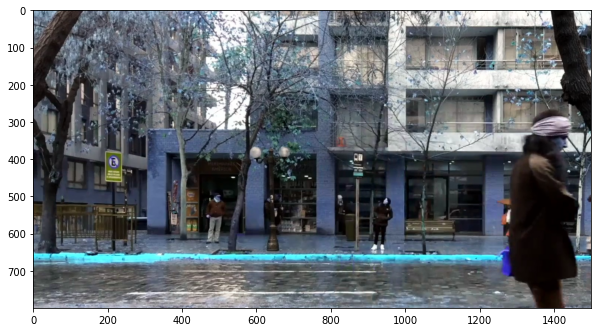

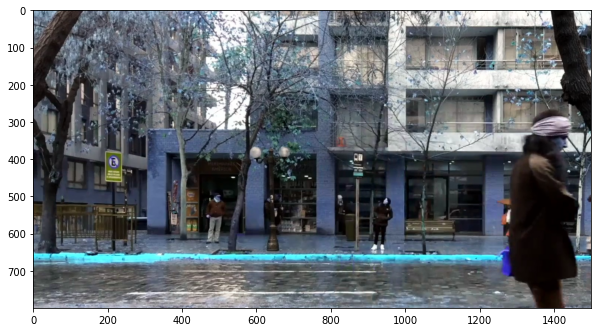

----------------------------------------------------------------------------------------------------
Number of matching points for the findHomography algorithm:
In left  image: 1464 
In right image: 1464


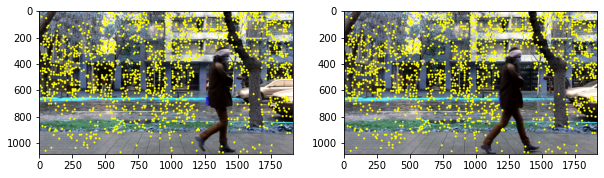

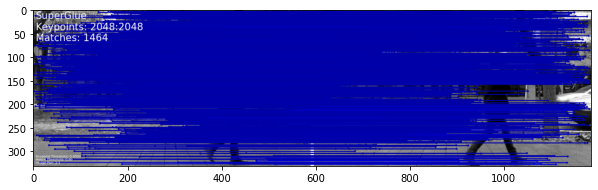

[[ 9.99808293e-01 -1.48989074e-05  4.29456884e-01]
 [-6.33561465e-05  9.99802003e-01  4.50541111e-01]
 [-7.57188195e-08 -5.94841260e-08  1.00000000e+00]]


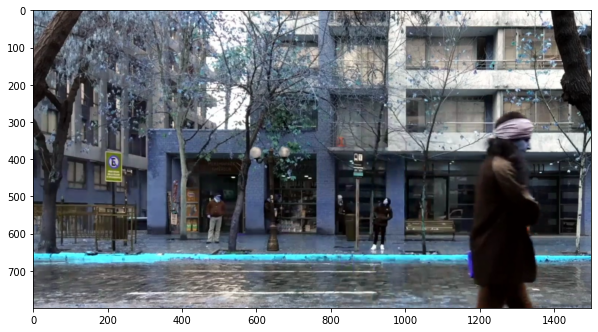

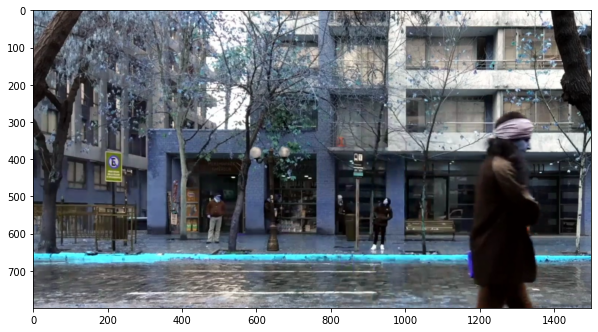

----------------------------------------------------------------------------------------------------


In [15]:
for imgSet in range(num_images-1,1,-1):  
    # loading points
    point_set1, point_set2 = loadNPZ(npz_files[num_images-1 -imgSet])
    pltSourceImages(imgSet)
    plotMatches(imgSet)    
    # getting the required source images
    im_left = cv.imread('adobe_panorama/{:01}.jpg'.format(imgSet),cv.IMREAD_ANYCOLOR)
    im_right = cv.imread('adobe_panorama/{:01}.jpg'.format(imgSet -1),cv.IMREAD_ANYCOLOR)
    #find Homography between two source images
    H, status = cv.findHomography(point_set1, point_set2, cv.RANSAC, 5.0) 
    # Prints the Homography matrix that transform left image to right image
    print(H) 
    # Applies a homogeneous transformation to an image.
    # To transform the right image to left we need to consider the inverse.
    panorama = cv.warpPerspective(im_right, np.linalg.inv(H), (1500,800)) 
    plt.figure(figsize=(10,10))
    plt.imshow(panorama, cmap='gray', vmin = 0, vmax = 255)
    #panorama[0:im_left.shape[0], 0:im_left.shape[1]] = im_left
    plt.figure(figsize=(10,10))
    plt.imshow(panorama, cmap='gray', vmin = 0, vmax = 255)
    plt.show()    
    print("-"*100)

# Editing Image

In [ ]:
%cp -r /content/drive/MyDrive/picture/.  /content/Stitch-images-using-SuperGlue-GNN/adobe_panorama


In [ ]:
#Trnaslation by 40 in Y direction
import cv2
import numpy as np

image = cv2.imread('/content/Stitch-images-using-SuperGlue-GNN/adobe_panorama/2.jpg')
shift = 40


for i in range(image.shape[0] -1, image.shape[0] - shift, -1):
    image = np.roll(image, -1, axis=0)
    image[-1, :] = 0

cv2.imwrite('/content/Stitch-images-using-SuperGlue-GNN/adobe_panorama/2.jpg', image)


True

In [ ]:
#rotating image by 45 degress
from scipy import ndimage

img=cv.imread('/content/Stitch-images-using-SuperGlue-GNN/adobe_panorama/1.jpg')
res=ndimage.rotate(img, 45)
res=cv.resize(res,(img.shape[1],img.shape[0]))
print(img.shape)
cv.imwrite('/content/Stitch-images-using-SuperGlue-GNN/adobe_panorama/1.jpg',res)

(1080, 1920, 3)


True

In [ ]:
img=cv.imread('/content/Stitch-images-using-SuperGlue-GNN/adobe_panorama/2.jpg')
img.shape

(1080, 1920, 3)

In [ ]:
res.shape

(1080, 1920, 3)

# Checking Rotation

In [18]:
import math
def getComponents(normalised_homography):
  '''((translationx, translationy), rotation, (scalex, scaley), shear)'''
  a = normalised_homography[0,0]
  b = normalised_homography[0,1]
  c = normalised_homography[0,2]
  d = normalised_homography[1,0]
  e = normalised_homography[1,1]
  f = normalised_homography[1,2]

  p = math.sqrt(a*a + b*b)
  r = (a*e - b*d)/(p)
  q = (a*d+b*e)/(a*e - b*d)

  translation = (c,f)
  scale = (p,r)
  shear = q
  theta = math.atan2(b,a)*180/math.pi

  return (translation, theta, scale, shear)

Output's order (Translation-x,Translation-y, Rotation, Scaling, Shear)

In [ ]:
H1=np.array([[ 1.00057460e+00,  6.65597953e-05,  6.13860605e+02],
 [-1.04364231e-04,  1.00021585e+00, -8.73177407e-02],
 [ 1.67117826e-07, -5.01623067e-08,  1.00000000e+00]])

In [ ]:
H2=np.array([[ 1.00021725e+00, -2.64742732e-04,  3.38052609e+02],
 [ 1.84106039e-04,  9.99775250e-01, -2.94014452e-02],
 [ 2.96930138e-07, -2.92292118e-07,  1.00000000e+00]])

In [16]:
H3=np.array([[ 9.99869709e-01, -5.25435469e-04,  2.61395329e-01],
 [ 1.68521301e-06,  9.99728137e-01,  1.14310283e-02],
 [ 1.53934496e-08, -3.84687398e-07,  1.00000000e+00]])

In [ ]:
print(getComponents(H1))
# no change so all 0

((613.860605, -0.0873177407), 0.0038114053168244407, (1.000574602213831, 1.0002158547294353), -3.782013657491175e-05)


In [ ]:
print(getComponents(H2))
# shows shift by 40 ,40 in both direction

((338.052609, -0.0294014452), -0.01516534617467702, (1.0002172850367448, 0.9997752637088867), -8.053779907444579e-05)


In [19]:
print(getComponents(H3))
#show rotation of 45 degres. May be due to rotation and resiziing showing as tranalted

((0.261395329, 0.0114310283), -0.030109154960855568, (0.9998698470591945, 0.9997279998459584), -0.0005238182656878481)
